<a href="https://colab.research.google.com/github/Balla01/Image_classification_chess_coins/blob/main/image_classi_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam


In [ ]:
import numpy as np
import pandas as pd
import os
import sys
import codecs
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
#!pip install keras-bert
#!pip install keras-rectified-adam
#!pip install tensorflow==2.2.1
#!pip install keras==2.3.0
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import random as rd
from sklearn.metrics import confusion_matrix,classification_report

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

from sklearn import decomposition
from sklearn.metrics import accuracy_score
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import MobileNetV2

from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications import MobileNetV2

import warnings
import os
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt   


from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Sequential

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
labels = ['Queen-Resized','Rook-resize','bishop_resized','knight-resize','pawn_resized']


def dataframer(base_dir):
    path = []
    label = []
    for img_class in os.listdir(base_dir):
      label_path = os.path.join(base_dir, img_class)
      if img_class in labels:
        for img in os.listdir(label_path):
          path.append(os.path.join(label_path, img))
          label.append(img_class)
    img_data = pd.DataFrame({'Path': path, 'Label': label})
    return img_data
            
train_base_dir = "/content/drive/MyDrive/loopr_vit_dse_assignment_data"
#validation_base_dir = "/content/drive/MyDrive/test_data_set"

train_img_data = dataframer(train_base_dir)
#validation_img_data = dataframer(validation_base_dir)

In [ ]:
X=train_img_data['Path']
y=train_img_data['Label']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=86)


In [ ]:
train_img_data = pd.DataFrame({'Path': x_train, 'Label': y_train})
validation_img_data = pd.DataFrame({'Path': x_test, 'Label': y_test})

In [ ]:
train_img_data

,Path,Label
88,/content/drive/MyDrive/loopr_vit_dse_assignmen...,Rook-resize
404,/content/drive/MyDrive/loopr_vit_dse_assignmen...,knight-resize
499,/content/drive/MyDrive/loopr_vit_dse_assignmen...,knight-resize
40,/content/drive/MyDrive/loopr_vit_dse_assignmen...,Rook-resize
161,/content/drive/MyDrive/loopr_vit_dse_assignmen...,Queen-Resized
...,...,...
27,/content/drive/MyDrive/loopr_vit_dse_assignmen...,Rook-resize
649,/content/drive/MyDrive/loopr_vit_dse_assignmen...,bishop_resized
99,/content/drive/MyDrive/loopr_vit_dse_assignmen...,Rook-resize
428,/content/drive/MyDrive/loopr_vit_dse_assignmen...,knight-resize


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    zoom_range = 0.1,
    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_img_data,
    x_col = "Path",
    y_col = "Label",
    target_size = (150,150),
    batch_size = 1024,
    class_mode = "categorical",
    subset = "training",
    shuffle = True,
    seed = 10
)

Found 612 validated image filenames belonging to 5 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = validation_img_data,
    x_col = "Path",
    y_col = "Label",
    target_size = (150,150),
    batch_size = 256,
    class_mode = "categorical",
    shuffle = False
)

Found 69 validated image filenames belonging to 5 classes.


In [ ]:
class_names = ['Queen-Resized','Rook-resize','bishop_resized','knight-resize','pawn_resized']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
IMAGE_SIZE = (150, 150) 
nb_classes = len(class_names)


building train and test data sets

In [ ]:
labels = train_img_data['Label']

In [ ]:
lable=[]
list(labels)
for i in labels:
  for j in range(len(class_names)):
    if i==class_names[j]:
      lable.append(j)

In [ ]:
images = []
for i in train_img_data['Path']:
  image = cv2.imread(i)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, IMAGE_SIZE) 
  images.append(image)

In [ ]:
labels2=validation_img_data['Label']
list(labels2)
labels1 = np.array(labels2)

In [ ]:
labels1=validation_img_data['Label']
list(labels1)
lable1=[]
for i in labels1:
  for j in range(len(class_names)):
    if i==class_names[j]:
      lable1.append(j)

In [ ]:
images1 = []
for i in validation_img_data['Path']:
  image = cv2.imread(i)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, IMAGE_SIZE) 
  images1.append(image)

In [ ]:
images = np.array(images, dtype = 'float32')
labels = np.array(lable, dtype = 'int32')
images1 = np.array(images1, dtype = 'float32')
labels1 = np.array(lable1, dtype = 'int32')

In [ ]:
train_images=images
train_labels=labels
test_images=images1
test_labels=labels1

In [ ]:
(train_images, train_labels), (test_images, test_labels) = [(images,labels),(images1,labels1)]

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 612
Number of testing examples: 69
Each image is of size: (150, 150)


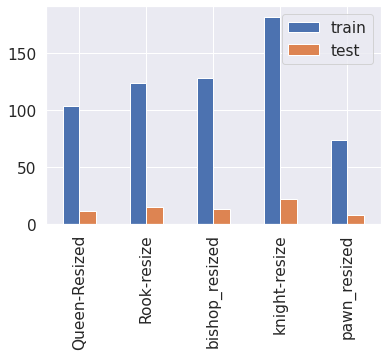

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

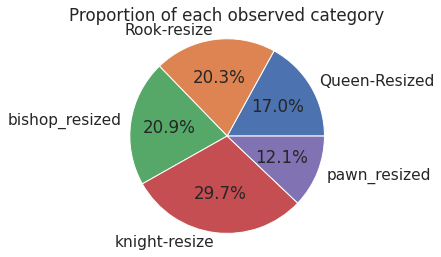

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

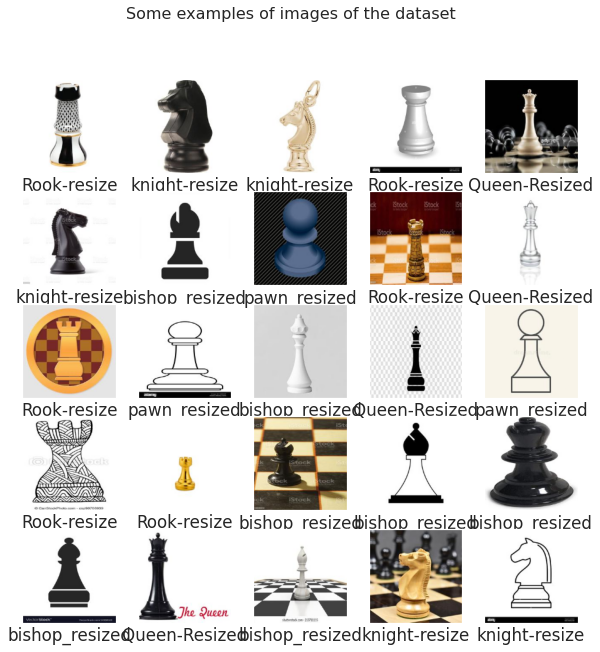

In [ ]:
display_examples(class_names, train_images, train_labels)

<H1>BASIC MODEL

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

check why it is getting error

In [ ]:
history01 = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 3.3727 - accuracy: 0.2658 - val_loss: 1.9969 - val_accuracy: 0.2602
Epoch 2/20
4/4 [==============================] - 12s 3s/step - loss: 1.9097 - accuracy: 0.1922 - val_loss: 1.6265 - val_accuracy: 0.1382
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 1.5569 - accuracy: 0.3579 - val_loss: 1.5735 - val_accuracy: 0.3171
Epoch 4/20
4/4 [==============================] - 14s 4s/step - loss: 1.4782 - accuracy: 0.4847 - val_loss: 1.5329 - val_accuracy: 0.3821
Epoch 5/20
4/4 [==============================] - 10s 2s/step - loss: 1.3219 - accuracy: 0.5072 - val_loss: 1.5342 - val_accuracy: 0.3089
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 1.1695 - accuracy: 0.5521 - val_loss: 1.4742 - val_accuracy: 0.4309
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 1.0200 - accuracy: 0.6912 - val_loss: 1.4233 - val_accuracy: 0.4472
Epoch 8/20
4/4 [======================

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

3/3 [==============================] - 1s 221ms/step - loss: 2.2597 - accuracy: 0.4348


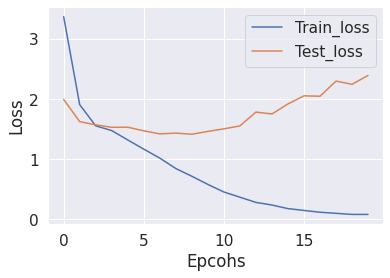

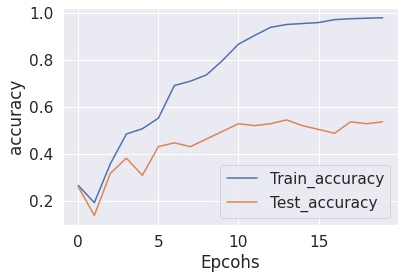

In [ ]:
import pandas as pd
r1 = pd.DataFrame(history01.history)
r1['Epcohs'] = history01.epoch
r1.tail()
plt.plot(r1['Epcohs'],r1['loss'],label='Train_loss')
plt.plot(r1['Epcohs'],r1['val_loss'],label='Test_loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(r1['Epcohs'],r1['accuracy'],label='Train_accuracy')
plt.plot(r1['Epcohs'],r1['val_accuracy'],label='Test_accuracy')
plt.xlabel('Epcohs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test_images)    
pred_labels = np.argmax(predictions, axis = 1) 
pred_labels

array([0, 0, 3, 1, 2, 2, 1, 3, 2, 4, 2, 0, 4, 4, 3, 0, 0, 3, 0, 3, 3, 3,
       1, 4, 3, 3, 1, 3, 2, 3, 2, 4, 4, 4, 3, 4, 0, 0, 3, 0, 2, 2, 0, 2,
       1, 3, 4, 0, 3, 4, 2, 1, 2, 3, 1, 2, 3, 3, 1, 0, 3, 4, 3, 1, 0, 0,
       4, 2, 1])

In [ ]:
cm = confusion_matrix(test_labels, pred_labels)
print(cm)
print(classification_report(test_labels, pred_labels))

[[ 4  0  2  2  3]
 [ 3  4  2  3  3]
 [ 1  2  7  1  2]
 [ 2  4  1 13  2]
 [ 4  0  1  1  2]]
              precision    recall  f1-score   support

           0       0.29      0.36      0.32        11
           1       0.40      0.27      0.32        15
           2       0.54      0.54      0.54        13
           3       0.65      0.59      0.62        22
           4       0.17      0.25      0.20         8

    accuracy                           0.43        69
   macro avg       0.41      0.40      0.40        69
weighted avg       0.46      0.43      0.44        69



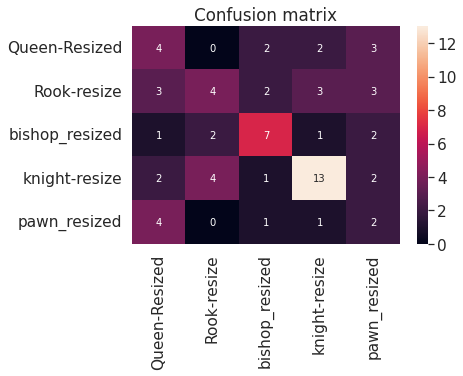

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

<H1> VGG16

method1

In [ ]:
model = VGG16(weights='imagenet', include_top=False)

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X)
C1 = C[:,0]
C2 = C[:,1]

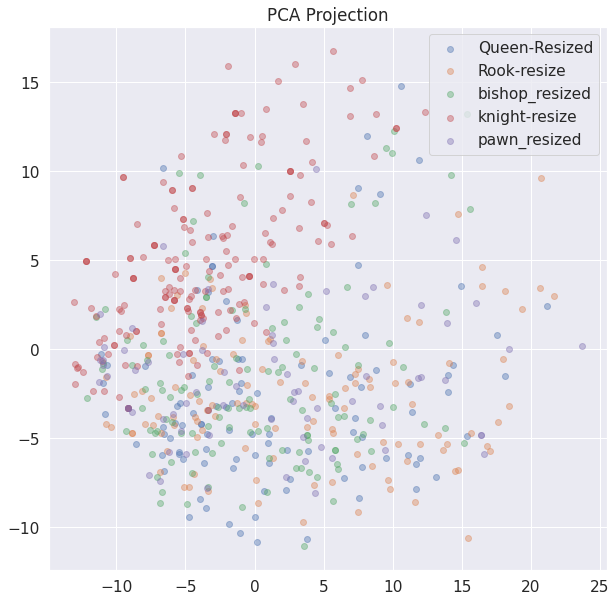

In [ ]:
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
4/4 [==============================] - 0s 40ms/step - loss: 1.5749 - accuracy: 0.3926 - val_loss: 1.1803 - val_accuracy: 0.5041
Epoch 2/15
4/4 [==============================] - 0s 19ms/step - loss: 0.8787 - accuracy: 0.6973 - val_loss: 0.9262 - val_accuracy: 0.6585
Epoch 3/15
4/4 [==============================] - 0s 19ms/step - loss: 0.5712 - accuracy: 0.8323 - val_loss: 0.6796 - val_accuracy: 0.7317
Epoch 4/15
4/4 [==============================] - 0s 19ms/step - loss: 0.4080 - accuracy: 0.8937 - val_loss: 0.6521 - val_accuracy: 0.7724
Epoch 5/15
4/4 [==============================] - 0s 20ms/step - loss: 0.3049 - accuracy: 0.9284 - val_loss: 0.5408 - val_accuracy: 0.7805
Epoch 6/15
4/4 [==============================] - 0s 20ms/step - loss: 0.2424 - accuracy: 0.9489 - val_loss: 0.5053 - val_accuracy: 0.8130
Epoch 7/15
4/4 [==============================] - 0s 20ms/step - loss: 0.1934 - accuracy: 0.9652 - val_loss: 0.5136 - val_accuracy: 0.8049
Epoch 8/15
4/4 [===========

In [ ]:
test_loss = model2.evaluate(test_features, test_labels)

3/3 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.7971


In [ ]:
predictions = model2.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1) 
pred_labels

array([1, 4, 2, 1, 4, 2, 2, 3, 4, 1, 3, 3, 3, 4, 3, 2, 1, 2, 0, 0, 0, 3,
       3, 1, 3, 3, 1, 3, 2, 1, 2, 2, 2, 2, 3, 1, 0, 4, 3, 0, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 3, 2, 3, 1, 2, 1, 3, 3, 3, 2, 0, 3, 2, 3, 3, 3, 4,
       1, 2, 1])

the below are original lables , the above is the predicted lables and both are very nearer

In [ ]:
test_labels

array([1, 4, 2, 1, 0, 2, 2, 3, 4, 1, 2, 3, 3, 4, 3, 4, 1, 4, 0, 1, 0, 3,
       3, 3, 3, 3, 3, 3, 2, 1, 0, 2, 1, 4, 3, 0, 0, 4, 3, 0, 2, 2, 2, 1,
       1, 1, 0, 1, 0, 0, 2, 3, 1, 3, 1, 3, 3, 3, 2, 0, 3, 2, 3, 3, 3, 4,
       1, 2, 1], dtype=int32)

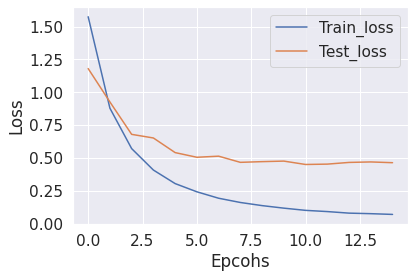

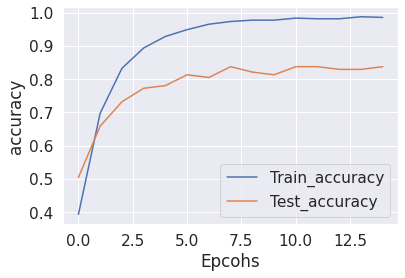

In [ ]:
import pandas as pd
r1 = pd.DataFrame(history2.history)
r1['Epcohs'] = history2.epoch
r1.tail()
plt.plot(r1['Epcohs'],r1['loss'],label='Train_loss')
plt.plot(r1['Epcohs'],r1['val_loss'],label='Test_loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(r1['Epcohs'],r1['accuracy'],label='Train_accuracy')
plt.plot(r1['Epcohs'],r1['val_accuracy'],label='Test_accuracy')
plt.xlabel('Epcohs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

method2

In [ ]:
np.random.seed(seed=1997)
n_estimators = 10
max_samples = 0.8
max_samples *= n_train
max_samples = int(max_samples)

In [ ]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [ ]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
4/4 [==============================] - 0s 39ms/step - loss: 1.6892 - accuracy: 0.2682 - val_loss: 1.0651 - val_accuracy: 0.6327
Epoch 2/10
4/4 [==============================] - 0s 21ms/step - loss: 0.9339 - accuracy: 0.6477 - val_loss: 0.7867 - val_accuracy: 0.7551
Epoch 3/10
4/4 [==============================] - 0s 23ms/step - loss: 0.5891 - accuracy: 0.8136 - val_loss: 0.5164 - val_accuracy: 0.7959
Epoch 4/10
4/4 [==============================] - 0s 20ms/step - loss: 0.4088 - accuracy: 0.8409 - val_loss: 0.4554 - val_accuracy: 0.8571
Epoch 5/10
4/4 [==============================] - 0s 20ms/step - loss: 0.2850 - accuracy: 0.9364 - val_loss: 0.3660 - val_accuracy: 0.9184
Epoch 6/10
4/4 [==============================] - 0s 20ms/step - loss: 0.2157 - accuracy: 0.9614 - val_loss: 0.3467 - val_accuracy: 0.8571
Epoch 7/10
4/4 [==============================] - 0s 20ms/step - loss: 0.1795 - accuracy: 0.9500 - val_loss: 0.3129 - val_accuracy: 0.8980
Epoch 8/10
4/4 [===========

In [ ]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.8260869565217391


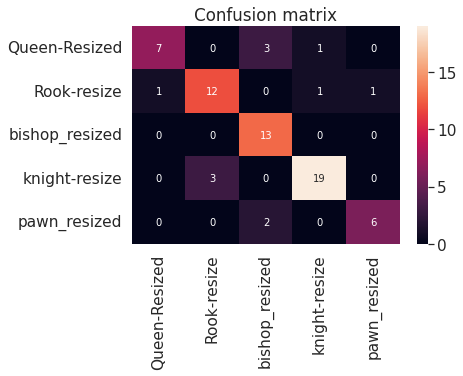

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

method3

In [ ]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
test_features = model.predict(test_images)
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [ ]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 9, 9, 512)         0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0   

In [ ]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Train on 489 samples, validate on 123 samples
Epoch 1/10
489/489 [==============================] - 37s 75ms/step - loss: 2.2392 - accuracy: 0.3190 - val_loss: 2.0281 - val_accuracy: 0.2439
Epoch 2/10
489/489 [==============================] - 50s 103ms/step - loss: 1.6426 - accuracy: 0.2843 - val_loss: 1.4933 - val_accuracy: 0.3577
Epoch 3/10
489/489 [==============================] - 55s 112ms/step - loss: 1.4037 - accuracy: 0.4274 - val_loss: 1.4532 - val_accuracy: 0.3171
Epoch 4/10
489/489 [==============================] - 44s 90ms/step - loss: 1.2864 - accuracy: 0.4090 - val_loss: 1.1171 - val_accuracy: 0.5447
Epoch 5/10
489/489 [==============================] - 46s 94ms/step - loss: 0.9338 - accuracy: 0.6789 - val_loss: 0.8950 - val_accuracy: 0.6667
Epoch 6/10
489/489 [==============================] - 47s 96ms/step - loss: 0.6445 - accuracy: 0.7771 - val_loss: 0.6540 - val_accuracy: 0.7805
Epoch 7/10
489/489 [==============================] - 36s 74ms/step - loss: 0.6317 - acc

In [ ]:
predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.8405797101449275


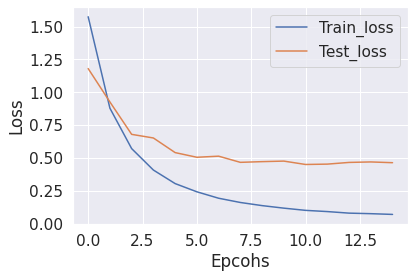

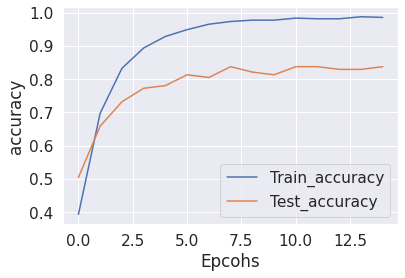

In [ ]:
import pandas as pd
r1 = pd.DataFrame(history2.history)
r1['Epcohs'] = history2.epoch
r1.tail()
plt.plot(r1['Epcohs'],r1['loss'],label='Train_loss')
plt.plot(r1['Epcohs'],r1['val_loss'],label='Test_loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(r1['Epcohs'],r1['accuracy'],label='Train_accuracy')
plt.plot(r1['Epcohs'],r1['val_accuracy'],label='Test_accuracy')
plt.xlabel('Epcohs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<h1>VGG19

In [ ]:
from keras.models import Model
model = VGG19(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
test_features = model.predict(test_images)
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG19(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [ ]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 9, 9, 512)         0         
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv4 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0   

In [ ]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Train on 489 samples, validate on 123 samples
Epoch 1/10
489/489 [==============================] - 36s 75ms/step - loss: 3.9569 - accuracy: 0.3436 - val_loss: 1.5278 - val_accuracy: 0.4065
Epoch 2/10
489/489 [==============================] - 41s 84ms/step - loss: 1.6066 - accuracy: 0.3333 - val_loss: 1.9521 - val_accuracy: 0.2602
Epoch 3/10
489/489 [==============================] - 34s 69ms/step - loss: 1.6710 - accuracy: 0.2945 - val_loss: 1.5936 - val_accuracy: 0.2439
Epoch 4/10
489/489 [==============================] - 38s 77ms/step - loss: 1.3530 - accuracy: 0.4254 - val_loss: 1.3176 - val_accuracy: 0.3415
Epoch 5/10
489/489 [==============================] - 35s 71ms/step - loss: 1.1426 - accuracy: 0.5072 - val_loss: 1.0906 - val_accuracy: 0.5528
Epoch 6/10
489/489 [==============================] - 38s 78ms/step - loss: 0.8198 - accuracy: 0.6605 - val_loss: 0.9516 - val_accuracy: 0.6016
Epoch 7/10
489/489 [==============================] - 35s 71ms/step - loss: 0.6317 - accur

In [ ]:
import pandas as pd
r1 = pd.DataFrame(history.history)
r1['Epcohs'] = history.epoch
print(r1.tail())
plt.plot(r1['Epcohs'],r1['loss'],label='Train_loss')
plt.plot(r1['Epcohs'],r1['val_loss'],label='Test_loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(r1['Epcohs'],r1['accuracy'],label='Train_accuracy')
plt.plot(r1['Epcohs'],r1['val_accuracy'],label='Test_accuracy')
plt.xlabel('Epcohs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<H1>MOBILE-NETV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False,
                         input_shape=(160, 160, 3))

# freeze pretrained ntework
for layer in base_model.layers:
    layer.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization

model = Sequential([base_model,  # MobileNetV2
                    GlobalAveragePooling2D(),
                    
#                     BatchNormalization(),     # not useful
                    Dense(1024, activation="elu", kernel_initializer="he_normal"),
                    Dropout(0.4),
                    
                    # output 5 classes
                    Dense(5, activation='softmax')
                   ])
# print the model architecture
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              1311744   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 5125      
Total params: 3,574,853
Trainable params: 1,316,869
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD
SGD(learning_rate=0.02, momentum=0.9, nesterov=True, decay=0.001)
# define variables
BATCH_SIZE = 32
SEED = 10
EPOCHES = 100  # we will use an EarlyStopping technique

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model.compile(loss="categorical_crossentropy", metrics=["accuracy"],
              optimizer=SGD(learning_rate=0.02, momentum=0.9,     
                            nesterov=True, decay=0.001))

# avoid overfitting
#cp = ModelCheckpoint('./intel_modelnetv2.h5', save_best_only=True)
es = EarlyStopping(patience=5, monitor='val_loss')

# train the net
history = model.fit(train_generator,
                     validation_data=validation_generator,
                     callbacks=[es],
                     epochs=10, verbose=2)

Epoch 1/10
1/1 - 2s - loss: 3.6587 - accuracy: 0.1471 - val_loss: 8.1220 - val_accuracy: 0.3333
Epoch 2/10
1/1 - 2s - loss: 7.6055 - accuracy: 0.3366 - val_loss: 13.7276 - val_accuracy: 0.1739
Epoch 3/10
1/1 - 2s - loss: 13.2205 - accuracy: 0.2288 - val_loss: 10.8701 - val_accuracy: 0.2319
Epoch 4/10
1/1 - 2s - loss: 10.7645 - accuracy: 0.2190 - val_loss: 6.1212 - val_accuracy: 0.4203
Epoch 5/10
1/1 - 3s - loss: 5.7916 - accuracy: 0.4461 - val_loss: 2.8850 - val_accuracy: 0.5072
Epoch 6/10
1/1 - 2s - loss: 2.6610 - accuracy: 0.5441 - val_loss: 2.3544 - val_accuracy: 0.5217
Epoch 7/10
1/1 - 2s - loss: 2.1706 - accuracy: 0.5866 - val_loss: 1.2421 - val_accuracy: 0.6812
Epoch 8/10
1/1 - 2s - loss: 1.2135 - accuracy: 0.7075 - val_loss: 0.7156 - val_accuracy: 0.7681
Epoch 9/10
1/1 - 3s - loss: 0.6328 - accuracy: 0.8137 - val_loss: 0.9960 - val_accuracy: 0.6377
Epoch 10/10
1/1 - 2s - loss: 0.9101 - accuracy: 0.7075 - val_loss: 0.8283 - val_accuracy: 0.7101


       loss  accuracy  val_loss  val_accuracy  Epcohs
5  2.660963  0.544118  2.354360      0.521739       5
6  2.170577  0.586601  1.242079      0.681159       6
7  1.213490  0.707516  0.715605      0.768116       7
8  0.632841  0.813725  0.996049      0.637681       8
9  0.910096  0.707516  0.828256      0.710145       9


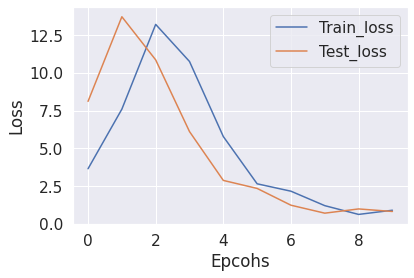

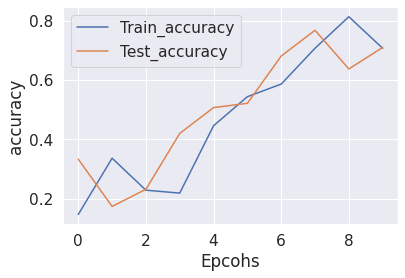

In [ ]:
import pandas as pd
r1 = pd.DataFrame(history.history)
r1['Epcohs'] = history.epoch
print(r1.tail())
plt.plot(r1['Epcohs'],r1['loss'],label='Train_loss')
plt.plot(r1['Epcohs'],r1['val_loss'],label='Test_loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(r1['Epcohs'],r1['accuracy'],label='Train_accuracy')
plt.plot(r1['Epcohs'],r1['val_accuracy'],label='Test_accuracy')
plt.xlabel('Epcohs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<H1> INCEPTION-V3

<h3>we need run this block with out running the above code and make sure that required train and test data should get run

In [ ]:

import tensorflow as tf
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Sequential

#Creating an instance of the InceptionNetV3 model using imagenet weights:
inception = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

#Defining all layers except the last 5 as non-trainable:
for layer in inception.layers[:-5]:
    layer.trainable = False

#Sequential model with layers of aforementioned InceptionNetV3 model 
#followed by a pooling layer, flattening layer and 4 dense layers:
inception_model = Sequential([
        inception,
        GlobalAveragePooling2D(),
        Flatten(),
        Dense(256, activation = "relu"),
        Dense(128, activation = "relu"),
        Dense(64, activation = "relu"),
        Dense(5, activation = 'softmax')
    ])

inception_model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                82

In [ ]:
inception_model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
rd.seed(150)
np.random.seed(150)
tf.random.set_seed(150)

In [ ]:
inception_history = inception_model.fit(
    train_generator,
    steps_per_epoch = 10,
    validation_data = validation_generator,
    validation_steps = 5,
    epochs = 20)
    #callbacks = [checkpoint])

Epoch 1/20
 1/10 [==>...........................] - ETA: 5:51 - loss: 1.8030 - accuracy: 0.2010

10/10 [==============================] - 58s 2s/step - loss: 1.8030 - accuracy: 0.2010 - val_loss: 2.3124 - val_accuracy: 0.3188


1/1 [==============================] - 7s 7s/step


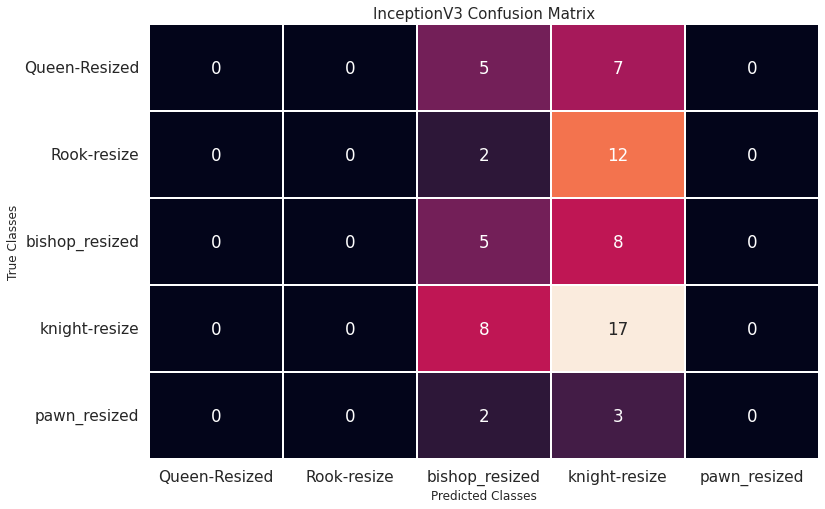

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Y_pred_inception = inception_model.predict(validation_generator)
y_pred_inception = np.argmax(Y_pred_inception, axis = 1)

inception_confusion_matrix = confusion_matrix(validation_generator.classes, y_pred_inception)
conf_matrix = pd.DataFrame(data = inception_confusion_matrix, columns = labels, index = labels)

plt.figure(figsize = (12, 8))
sns.heatmap(conf_matrix, annot = True, cbar = False, fmt = 'd', linewidth = 0.5)
plt.xlabel('Predicted Classes', fontsize = 12)
plt.ylabel('True Classes', fontsize = 12)
plt.title('InceptionV3 Confusion Matrix', fontsize = 15)
plt.show()

<H1>RES NET-50

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)


94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
1/1 [==============================] - 72s 72s/step - loss: 1.8202 - accuracy: 0.1683 - val_loss: 1.5539 - val_accuracy: 0.3623
Epoch 2/10
1/1 [==============================] - 61s 61s/step - loss: 1.6186 - accuracy: 0.2925 - val_loss: 1.6581 - val_accuracy: 0.2464
Epoch 3/10
1/1 [==============================] - 63s 63s/step - loss: 1.7110 - accuracy: 0.2500 - val_loss: 1.6274 - val_accuracy: 0.2899
Epoch 4/10
1/1 [==============================] - 62s 62s/step - loss: 1.6973 - accuracy: 0.2598 - val_loss: 1.5437 - val_accuracy: 0.3623
Epoch 5/10
1/1 [==============================] - 60s 60s/step - loss: 1.6211 - accuracy: 0.2958 - val_loss: 1.4910 - val_accuracy: 0.3623
Epoch 6/10
1/1 [==============================] - 60s 60s/step - loss: 1.5561 - accuracy: 0.2925 - val_loss: 1.4960 - val_accuracy: 0.3623
Epoch 7/10
1/1 [==============================] - 64s 64s/step - loss: 1.5361 - accuracy: 0.2941 - val_loss: 1.5502 - val_accuracy: 0.2609
Epoch 8/10
1/1 [===========

       loss  accuracy  val_loss  val_accuracy  Epcohs
5  1.556096  0.292484  1.495957      0.362319       5
6  1.536123  0.294118  1.550159      0.260870       6
7  1.569750  0.253268  1.572555      0.275362       7
8  1.586869  0.241830  1.540844      0.333333       8
9  1.554801  0.281046  1.495651      0.362319       9


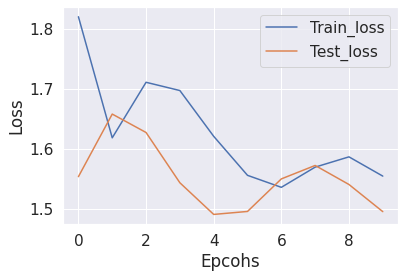

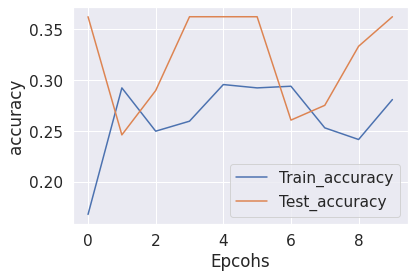

In [ ]:
import pandas as pd
r1 = pd.DataFrame(history.history)
r1['Epcohs'] = history.epoch
print(r1.tail())
plt.plot(r1['Epcohs'],r1['loss'],label='Train_loss')
plt.plot(r1['Epcohs'],r1['val_loss'],label='Test_loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(r1['Epcohs'],r1['accuracy'],label='Train_accuracy')
plt.plot(r1['Epcohs'],r1['val_accuracy'],label='Test_accuracy')
plt.xlabel('Epcohs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<H2>CONCLUSION :</H2>COMPARISION OF ALL THE MODELS  "MOBILENET-V2 ARCHITECTURE" IS GIVING THE HIGH ACCURACY

<h1>predictions using MOBILENET-V2 MODEL

In [ ]:
train_generator.class_indices

{'Queen-Resized': 0,
 'Rook-resize': 1,
 'bishop_resized': 2,
 'knight-resize': 3,
 'pawn_resized': 4}

In [ ]:
import numpy as np
predictions = model.predict(validation_generator)    
pred_labels = np.argmax(predictions, axis = 1) 

1/1 [==============================] - 2s 2s/step


In [ ]:
pred_labels

array([2, 2, 2, 1, 2, 2, 2, 2, 4, 2, 1, 2, 1, 0, 3, 1, 0, 2, 4, 1, 4, 3,
       0, 3, 3, 3, 1, 2, 3, 1, 4, 3, 2, 3, 3, 1, 1, 0, 3, 1, 1, 1, 1, 0,
       0, 4, 0, 0, 0, 2, 3, 4, 3, 2, 3, 1])